In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Path to your event file
event_file = "/home/treerspeaking/src/python/cabdefect/lightning_logs/goat_supervised/events.out.tfevents.1749884736.treerspeaking-pc.1617025.0"

# Load the event file
event_acc = EventAccumulator(event_file)
event_acc.Reload()

# Get all tags (keys)
tags = event_acc.Tags()
print(tags)

2025-06-23 16:04:25.590400: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-23 16:04:25.698148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750669465.748762   56608 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750669465.766066   56608 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750669465.858450   56608 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['hp_metric', 'train/co_dinh_cap_acc', 'train/co_dinh_cap_loss', 'train/bo_chia_acc', 'train/bo_chia_loss', 'train/han_box_acc', 'train/han_box_loss', 'train/learning_rate', 'train/total_loss', 'epoch', 'val/co_dinh_cap_precision_class_0', 'val/co_dinh_cap_recall_class_0', 'val/co_dinh_cap_accuracy_class_0', 'val/co_dinh_cap_precision_class_1', 'val/co_dinh_cap_recall_class_1', 'val/co_dinh_cap_accuracy_class_1', 'val/bo_chia_precision_class_0', 'val/bo_chia_recall_class_0', 'val/bo_chia_accuracy_class_0', 'val/bo_chia_precision_class_1', 'val/bo_chia_recall_class_1', 'val/bo_chia_accuracy_class_1', 'val/han_box_precision_class_0', 'val/han_box_recall_class_0', 'val/han_box_accuracy_class_0', 'val/han_box_precision_class_1', 'val/han_box_recall_class_1', 'val/han_box_accuracy_class_1', 'val/co_dinh_cap_loss', 'val/co_dinh_cap_accuracy', 'val/co_dinh_cap_precision', 'val/co_dinh_cap_recall', 'val/co_dinh_cap_avg_class_accuracy', '

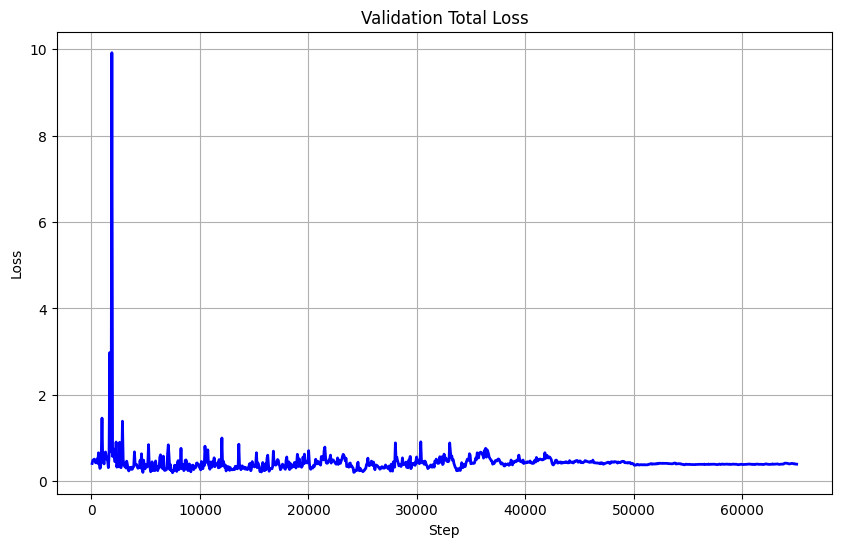

In [2]:
import numpy as np

import matplotlib.pyplot as plt

# Extract 'val/total_loss' data
val_loss_data = event_acc.Scalars('val/total_loss')

# Convert to lists for plotting
steps = [event.step for event in val_loss_data]
values = [event.value for event in val_loss_data]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(steps, values, 'b-', linewidth=2)
plt.title('Validation Total Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

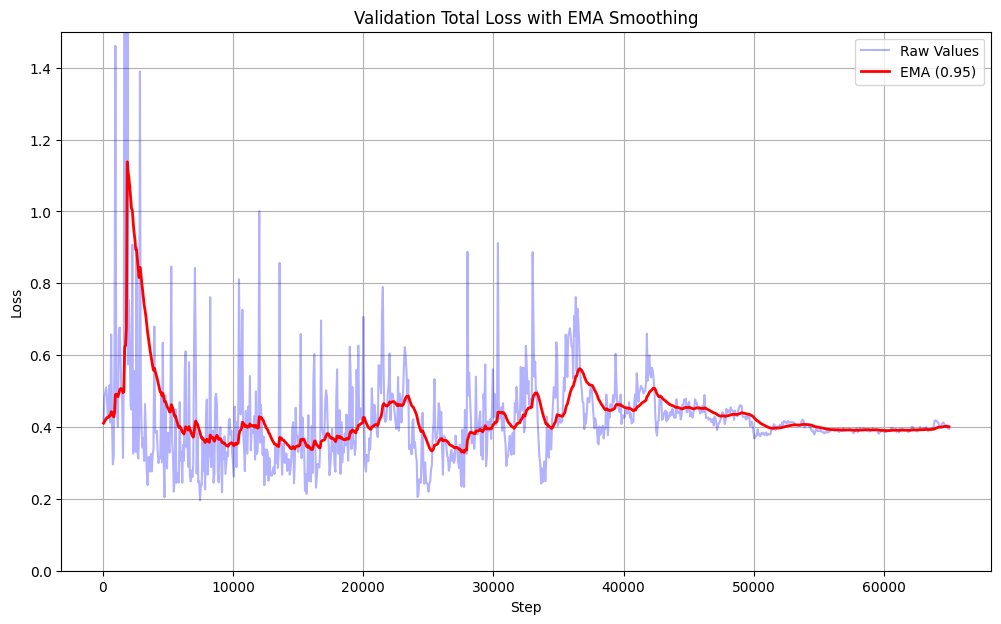

In [3]:
# Calculate EMA with smoothing factor of 0.95
ema_values = np.zeros_like(values)
ema_values[0] = values[0]  # Initialize with first value
for i in range(1, len(values)):
    ema_values[i] = 0.95 * ema_values[i-1] + 0.05 * values[i]

# Create the plot
plt.figure(figsize=(12, 7))
plt.plot(steps, values, 'b-', alpha=0.3, label='Raw Values')
plt.plot(steps, ema_values, 'r-', linewidth=2, label='EMA (0.95)')
plt.title('Validation Total Loss with EMA Smoothing')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.ylim((0, 1.5))
plt.legend()

plt.show()

In [4]:
event_file = "/home/treerspeaking/src/python/cabdefect/lightning_logs/goat_supervised/events.out.tfevents.1749884736.treerspeaking-pc.1617025.0"
event_fix_match = "/home/treerspeaking/src/python/cabdefect/lightning_logs/version_297/events.out.tfevents.1750579030.treerspeaking-pc.66286.0"
event_han_box = "/home/treerspeaking/src/python/cabdefect/lightning_logs/goat_han_box_2/events.out.tfevents.1750091832.treerspeaking-pc.1573335.0"
event_co_dinh_cap = "/home/treerspeaking/src/python/cabdefect/lightning_logs/goat_co_dinh_2/events.out.tfevents.1750142141.treerspeaking-pc.57891.0"

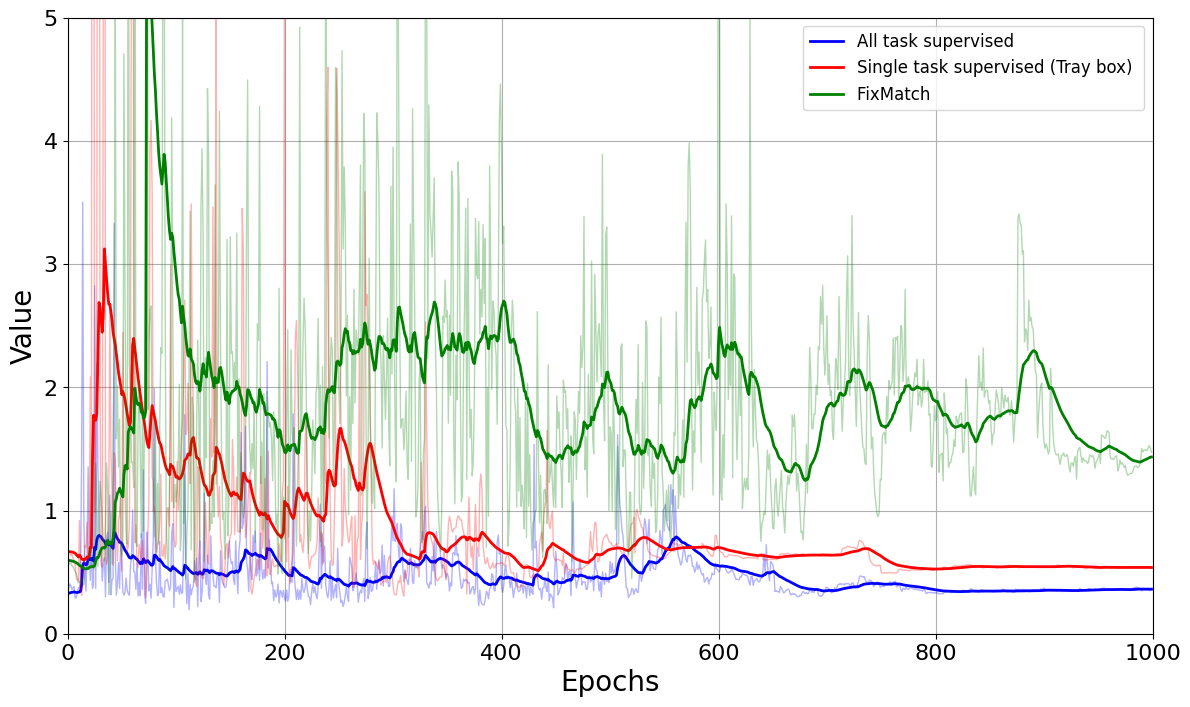

In [5]:
def load_and_plot_tensorboard_logs_by_epoch(log_files, smoothing=0.95, ylim=None, max_epoch=1000):
    """
    Load and plot data from multiple TensorBoard log files using epochs on x-axis.
    
    Args:
        log_files: List of (file_path, name, tag) tuples
        smoothing: EMA smoothing factor
        ylim: Y-axis limits (min, max) or None for auto-scaling
        max_epoch: Maximum epoch to show on x-axis
    """
    plt.figure(figsize=(14, 8))
    
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
    
    for i, (log_file, name, tag) in enumerate(log_files):
        color = colors[i % len(colors)]
        
        # Load the event file
        acc = EventAccumulator(log_file)
        acc.Reload()
        
        # Check if the tag exists
        if tag not in acc.Tags()['scalars']:
            print(f"Tag {tag} not found in log file {log_file}")
            continue
        
        # Extract data for the specified tag
        data = acc.Scalars(tag)
        
        # Try to get epoch data
        if 'epoch' in acc.Tags()['scalars']:
            epoch_data = acc.Scalars('epoch')
            
            # Create mapping from step to epoch
            step_to_epoch = {event.step: event.value for event in epoch_data}
            
            # Convert steps to epochs for our data
            x_values = []
            y_values = []
            
            for event in data:
                if event.step in step_to_epoch:
                    epoch = step_to_epoch[event.step]
                    if epoch <= max_epoch:
                        x_values.append(epoch)
                        y_values.append(event.value)
        else:
            print(f"Epoch data not found in {log_file}, estimating epochs")
            # Estimate epochs based on step count
            steps = [event.step for event in data]
            y_values = [event.value for event in data]
            max_step = max(steps)
            x_values = [step * max_epoch / max_step for step in steps]
        
        # Calculate EMA
        ema_values = np.zeros_like(y_values, dtype=float)
        if len(y_values) > 0:
            ema_values[0] = y_values[0]
            for j in range(1, len(y_values)):
                ema_values[j] = smoothing * ema_values[j-1] + (1-smoothing) * y_values[j]
        
        # Plot raw values with low alpha
        plt.plot(x_values, y_values, color=color, alpha=0.3, linestyle='-', linewidth=1)
        # Plot EMA values with high alpha
        plt.plot(x_values, ema_values, color=color, alpha=1.0, linestyle='-', linewidth=2, label=f"{name} ")
    
    # plt.title('Training/Validation Comparison')
    plt.xlabel('Epochs', fontsize=20)
    plt.ylabel('Value', fontsize=20)
    plt.grid(True)
    plt.xlim(0, max_epoch)
    if ylim:
        plt.ylim(ylim)
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=16)  # Adjust size as needed
    plt.show()

# Example usage with our current log files
log_files = [
    (event_file, "All task supervised", "val/han_box_loss"),
    (event_han_box, "Single task supervised (Tray box)", "val/total_loss"),
    (event_fix_match, "FixMatch", "val/han_box_loss")
]

# Plot the log using epochs instead of steps
load_and_plot_tensorboard_logs_by_epoch(log_files, smoothing=0.95, ylim=(0, 5.0), max_epoch=1000)
# Validation han_box

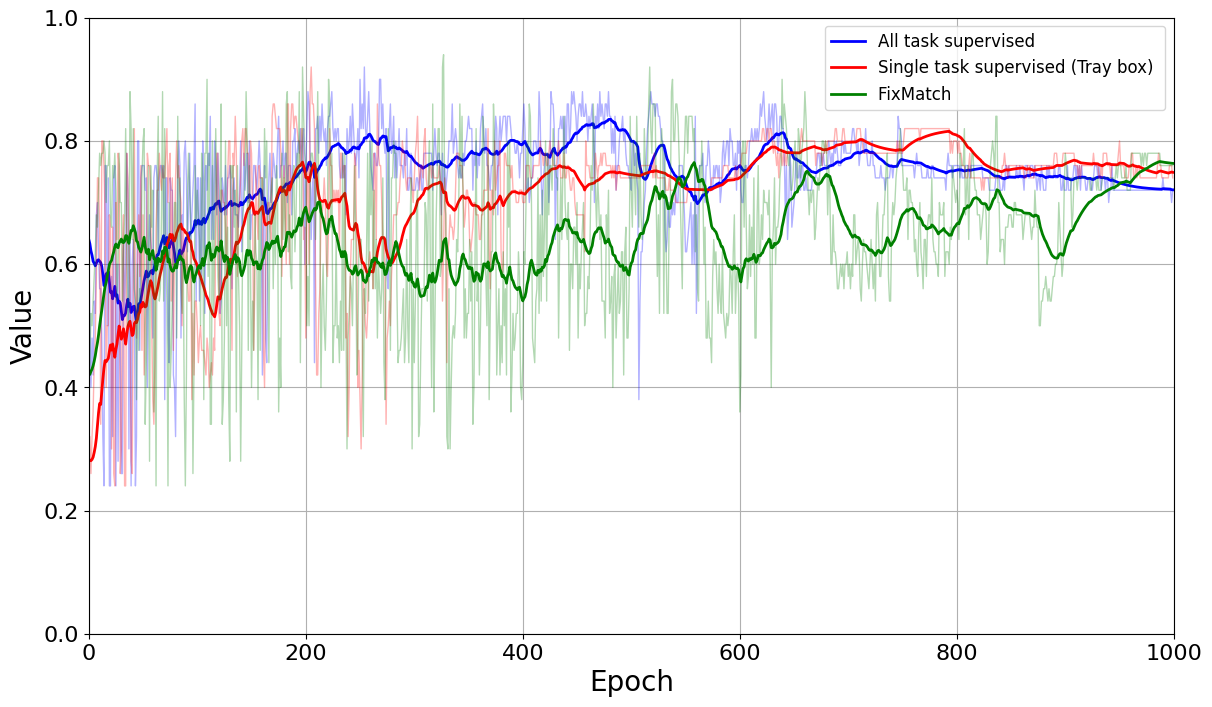

In [6]:
def load_and_plot_tensorboard_logs_by_epoch(log_files, smoothing=0.95, ylim=None, max_epoch=1000):
    """
    Load and plot data from multiple TensorBoard log files using epochs on x-axis.
    
    Args:
        log_files: List of (file_path, name, tag) tuples
        smoothing: EMA smoothing factor
        ylim: Y-axis limits (min, max) or None for auto-scaling
        max_epoch: Maximum epoch to show on x-axis
    """
    plt.figure(figsize=(14, 8))
    
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
    
    for i, (log_file, name, tag) in enumerate(log_files):
        color = colors[i % len(colors)]
        
        # Load the event file
        acc = EventAccumulator(log_file)
        acc.Reload()
        
        # Check if the tag exists
        if tag not in acc.Tags()['scalars']:
            print(f"Tag {tag} not found in log file {log_file}")
            continue
        
        # Extract data for the specified tag
        data = acc.Scalars(tag)
        
        # Try to get epoch data
        if 'epoch' in acc.Tags()['scalars']:
            epoch_data = acc.Scalars('epoch')
            
            # Create mapping from step to epoch
            step_to_epoch = {event.step: event.value for event in epoch_data}
            
            # Convert steps to epochs for our data
            x_values = []
            y_values = []
            
            for event in data:
                if event.step in step_to_epoch:
                    epoch = step_to_epoch[event.step]
                    if epoch <= max_epoch:
                        x_values.append(epoch)
                        y_values.append(event.value)
        else:
            print(f"Epoch data not found in {log_file}, estimating epochs")
            # Estimate epochs based on step count
            steps = [event.step for event in data]
            y_values = [event.value for event in data]
            max_step = max(steps)
            x_values = [step * max_epoch / max_step for step in steps]
        
        # Calculate EMA
        ema_values = np.zeros_like(y_values, dtype=float)
        if len(y_values) > 0:
            ema_values[0] = y_values[0]
            for j in range(1, len(y_values)):
                ema_values[j] = smoothing * ema_values[j-1] + (1-smoothing) * y_values[j]
        
        # Plot raw values with low alpha
        plt.plot(x_values, y_values, color=color, alpha=0.3, linestyle='-', linewidth=1)
        # Plot EMA values with high alpha
        plt.plot(x_values, ema_values, color=color, alpha=1.0, linestyle='-', linewidth=2, label=f"{name} ")
    
    # plt.title('Training/Validation Comparison')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Value', fontsize=20)
    plt.grid(True)
    plt.xlim(0, max_epoch)
    if ylim:
        plt.ylim(ylim)
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=16)  # Adjust size as needed
    plt.show()

# Example usage with our current log files
log_files = [
    (event_file, "All task supervised", "val/han_box_accuracy"),
    (event_han_box, "Single task supervised (Tray box)", "val/han_box_accuracy"),
    (event_fix_match, "FixMatch", "val/han_box_accuracy")
]

# Plot the log using epochs instead of steps
load_and_plot_tensorboard_logs_by_epoch(log_files, smoothing=0.95, ylim=(0, 1.0), max_epoch=1000)
# han_box accucracy 

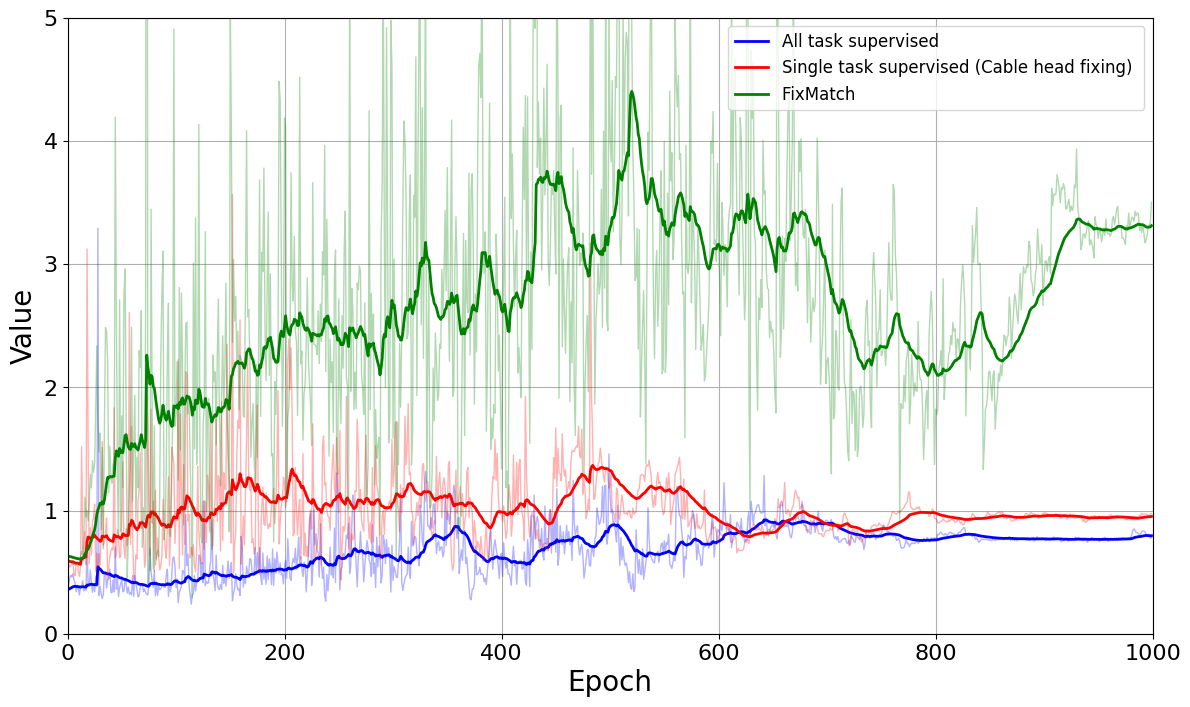

In [7]:
def load_and_plot_tensorboard_logs_by_epoch(log_files, smoothing=0.95, ylim=None, max_epoch=1000):
    """
    Load and plot data from multiple TensorBoard log files using epochs on x-axis.
    
    Args:
        log_files: List of (file_path, name, tag) tuples
        smoothing: EMA smoothing factor
        ylim: Y-axis limits (min, max) or None for auto-scaling
        max_epoch: Maximum epoch to show on x-axis
    """
    plt.figure(figsize=(14, 8))
    
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
    
    for i, (log_file, name, tag) in enumerate(log_files):
        color = colors[i % len(colors)]
        
        # Load the event file
        acc = EventAccumulator(log_file)
        acc.Reload()
        
        # Check if the tag exists
        if tag not in acc.Tags()['scalars']:
            print(f"Tag {tag} not found in log file {log_file}")
            continue
        
        # Extract data for the specified tag
        data = acc.Scalars(tag)
        
        # Try to get epoch data
        if 'epoch' in acc.Tags()['scalars']:
            epoch_data = acc.Scalars('epoch')
            
            # Create mapping from step to epoch
            step_to_epoch = {event.step: event.value for event in epoch_data}
            
            # Convert steps to epochs for our data
            x_values = []
            y_values = []
            
            for event in data:
                if event.step in step_to_epoch:
                    epoch = step_to_epoch[event.step]
                    if epoch <= max_epoch:
                        x_values.append(epoch)
                        y_values.append(event.value)
        else:
            print(f"Epoch data not found in {log_file}, estimating epochs")
            # Estimate epochs based on step count
            steps = [event.step for event in data]
            y_values = [event.value for event in data]
            max_step = max(steps)
            x_values = [step * max_epoch / max_step for step in steps]
        
        # Calculate EMA
        ema_values = np.zeros_like(y_values, dtype=float)
        if len(y_values) > 0:
            ema_values[0] = y_values[0]
            for j in range(1, len(y_values)):
                ema_values[j] = smoothing * ema_values[j-1] + (1-smoothing) * y_values[j]
        
        # Plot raw values with low alpha
        plt.plot(x_values, y_values, color=color, alpha=0.3, linestyle='-', linewidth=1)
        # Plot EMA values with high alpha
        plt.plot(x_values, ema_values, color=color, alpha=1.0, linestyle='-', linewidth=2, label=f"{name} ")
    
    # plt.title('Training/Validation Comparison')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Value', fontsize=20)
    plt.grid(True)
    plt.xlim(0, max_epoch)
    if ylim:
        plt.ylim(ylim)
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=16)  # Adjust size as needed
    plt.show()

# Example usage with our current log files
log_files = [
    (event_file, "All task supervised", "val/co_dinh_cap_loss"),
    (event_co_dinh_cap, "Single task supervised (Cable head fixing)", "val/total_loss"),
    (event_fix_match, "FixMatch", "val/co_dinh_cap_loss")
]

# Plot the log using epochs instead of steps
load_and_plot_tensorboard_logs_by_epoch(log_files, smoothing=0.95, ylim=(0, 5), max_epoch=1000)


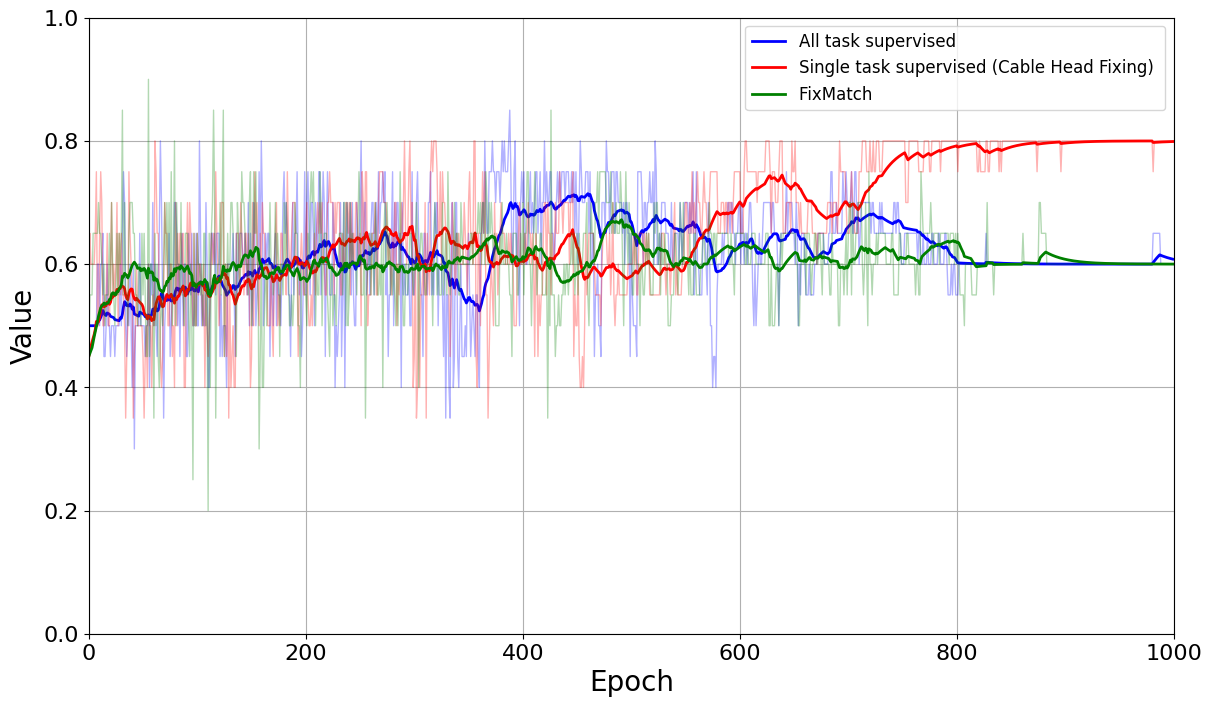

In [8]:
def load_and_plot_tensorboard_logs_by_epoch(log_files, smoothing=0.95, ylim=None, max_epoch=1000):
    """
    Load and plot data from multiple TensorBoard log files using epochs on x-axis.
    
    Args:
        log_files: List of (file_path, name, tag) tuples
        smoothing: EMA smoothing factor
        ylim: Y-axis limits (min, max) or None for auto-scaling
        max_epoch: Maximum epoch to show on x-axis
    """
    plt.figure(figsize=(14, 8))
    
    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
    
    for i, (log_file, name, tag) in enumerate(log_files):
        color = colors[i % len(colors)]
        
        # Load the event file
        acc = EventAccumulator(log_file)
        acc.Reload()
        
        # Check if the tag exists
        if tag not in acc.Tags()['scalars']:
            print(f"Tag {tag} not found in log file {log_file}")
            continue
        
        # Extract data for the specified tag
        data = acc.Scalars(tag)
        
        # Try to get epoch data
        if 'epoch' in acc.Tags()['scalars']:
            epoch_data = acc.Scalars('epoch')
            
            # Create mapping from step to epoch
            step_to_epoch = {event.step: event.value for event in epoch_data}
            
            # Convert steps to epochs for our data
            x_values = []
            y_values = []
            
            for event in data:
                if event.step in step_to_epoch:
                    epoch = step_to_epoch[event.step]
                    if epoch <= max_epoch:
                        x_values.append(epoch)
                        y_values.append(event.value)
        else:
            print(f"Epoch data not found in {log_file}, estimating epochs")
            # Estimate epochs based on step count
            steps = [event.step for event in data]
            y_values = [event.value for event in data]
            max_step = max(steps)
            x_values = [step * max_epoch / max_step for step in steps]
        
        # Calculate EMA
        ema_values = np.zeros_like(y_values, dtype=float)
        if len(y_values) > 0:
            ema_values[0] = y_values[0]
            for j in range(1, len(y_values)):
                ema_values[j] = smoothing * ema_values[j-1] + (1-smoothing) * y_values[j]
        
        # Plot raw values with low alpha
        plt.plot(x_values, y_values, color=color, alpha=0.3, linestyle='-', linewidth=1)
        # Plot EMA values with high alpha
        plt.plot(x_values, ema_values, color=color, alpha=1.0, linestyle='-', linewidth=2, label=f"{name} ")
    
    # plt.title('Training/Validation Comparison')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('Value', fontsize=20)
    plt.grid(True)
    plt.xlim(0, max_epoch)
    if ylim:
        plt.ylim(ylim)
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=16)  # Adjust size as needed
    plt.show()

# Example usage with our current log files
log_files = [
    (event_file, "All task supervised", "val/co_dinh_cap_accuracy"),
    (event_co_dinh_cap, "Single task supervised (Cable Head Fixing)", "val/co_dinh_cap_accuracy"),
    (event_fix_match, "FixMatch", "val/co_dinh_cap_accuracy")
]

# Plot the log using epochs instead of steps
load_and_plot_tensorboard_logs_by_epoch(log_files, smoothing=0.95, ylim=(0, 1.0), max_epoch=1000)